In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# load full dataset
X = pd.read_csv('BibGDMFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibGDMDependentVariableLGAEncoded.csv')

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ethnicity_Other             848 non-null    float64
 1   ethnicity_South Asian       848 non-null    float64
 2   ethnicity_White             848 non-null    float64
 3   ethnicity_missing           848 non-null    float64
 4   maternalDiabetes_No         848 non-null    float64
 5   maternalDiabetes_Yes        848 non-null    float64
 6   maternalDiabetes_missing    848 non-null    float64
 7   fhEclampsia_No              848 non-null    float64
 8   fhEclampsia_Not documented  848 non-null    float64
 9   fhEclampsia_Yes             848 non-null    float64
 10  fhEclampsia_missing         848 non-null    float64
 11  gdm_Yes                     848 non-null    float64
 12  gdmDiet_No                  848 non-null    float64
 13  gdmDiet_Yes                 848 non

In [4]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(X)

# get the component variance
# Proportion of Variance 
pca_out.explained_variance_ratio_

array([2.66268361e-01, 1.72807244e-01, 1.09737179e-01, 8.39033678e-02,
       6.02811898e-02, 4.05366632e-02, 3.93268204e-02, 3.05829344e-02,
       2.76965767e-02, 2.07625468e-02, 1.96110206e-02, 1.70962958e-02,
       1.55231942e-02, 1.42731801e-02, 1.04041453e-02, 8.51950827e-03,
       7.20988884e-03, 6.80857998e-03, 6.16036483e-03, 5.93367022e-03,
       5.57928861e-03, 4.54980729e-03, 4.23006472e-03, 3.72676037e-03,
       3.60497449e-03, 3.07272877e-03, 2.34933323e-03, 2.05147301e-03,
       1.60026259e-03, 1.46650471e-03, 9.59660591e-04, 8.09719928e-04,
       6.13987458e-04, 5.88036274e-04, 5.14449311e-04, 3.91148612e-04,
       1.79394658e-04, 1.38758412e-04, 1.30915515e-04, 5.78555032e-32,
       6.43144775e-33, 4.54463261e-33, 3.46492892e-33, 2.66270875e-33,
       2.39051450e-33, 9.08832285e-34, 9.08832285e-34, 9.08832285e-34,
       9.08832285e-34, 9.08832285e-34, 9.08832285e-34, 9.08832285e-34,
       9.08832285e-34, 8.66704651e-34, 5.07580937e-34, 3.10201453e-34,
      

In [5]:
for x in pca_out.explained_variance_ratio_:
    print ("%.1f" % (x*100))

26.6
17.3
11.0
8.4
6.0
4.1
3.9
3.1
2.8
2.1
2.0
1.7
1.6
1.4
1.0
0.9
0.7
0.7
0.6
0.6
0.6
0.5
0.4
0.4
0.4
0.3
0.2
0.2
0.2
0.1
0.1
0.1
0.1
0.1
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [6]:
pca_out.n_features_

57

In [7]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([5.94244331e+00, 3.85662512e+00, 2.44905915e+00, 1.87251314e+00,
       1.34532526e+00, 9.04676852e-01, 8.77676189e-01, 6.82534540e-01,
       6.18118262e-01, 4.63368073e-01, 4.37668889e-01, 3.81546528e-01,
       3.46438836e-01, 3.18541651e-01, 2.32194481e-01, 1.90134099e-01,
       1.60906671e-01, 1.51950462e-01, 1.37483922e-01, 1.32424666e-01,
       1.24515756e-01, 1.01540310e-01, 9.44044559e-02, 8.31719627e-02,
       8.04540067e-02, 6.85756145e-02, 5.24312368e-02, 4.57837424e-02,
       3.57138553e-02, 3.27287142e-02, 2.14172222e-02, 1.80709219e-02,
       1.37026632e-02, 1.31234977e-02, 1.14812209e-02, 8.72945791e-03,
       4.00363971e-03, 3.09674041e-03, 2.92170659e-03, 1.29119001e-30,
       1.43533815e-31, 1.01424824e-31, 7.73285401e-32, 5.94249941e-32,
       5.33502997e-32, 2.02828616e-32, 2.02828616e-32, 2.02828616e-32,
       2.02828616e-32, 2.02828616e-32, 2.02828616e-32, 2.02828616e-32,
       2.02828616e-32, 1.93426783e-32, 1.13279360e-32, 6.92291994e-33,
      

In [8]:
pca_out.explained_variance_ratio_

array([2.66268361e-01, 1.72807244e-01, 1.09737179e-01, 8.39033678e-02,
       6.02811898e-02, 4.05366632e-02, 3.93268204e-02, 3.05829344e-02,
       2.76965767e-02, 2.07625468e-02, 1.96110206e-02, 1.70962958e-02,
       1.55231942e-02, 1.42731801e-02, 1.04041453e-02, 8.51950827e-03,
       7.20988884e-03, 6.80857998e-03, 6.16036483e-03, 5.93367022e-03,
       5.57928861e-03, 4.54980729e-03, 4.23006472e-03, 3.72676037e-03,
       3.60497449e-03, 3.07272877e-03, 2.34933323e-03, 2.05147301e-03,
       1.60026259e-03, 1.46650471e-03, 9.59660591e-04, 8.09719928e-04,
       6.13987458e-04, 5.88036274e-04, 5.14449311e-04, 3.91148612e-04,
       1.79394658e-04, 1.38758412e-04, 1.30915515e-04, 5.78555032e-32,
       6.43144775e-33, 4.54463261e-33, 3.46492892e-33, 2.66270875e-33,
       2.39051450e-33, 9.08832285e-34, 9.08832285e-34, 9.08832285e-34,
       9.08832285e-34, 9.08832285e-34, 9.08832285e-34, 9.08832285e-34,
       9.08832285e-34, 8.66704651e-34, 5.07580937e-34, 3.10201453e-34,
      

In [9]:
pcaDF = pd.DataFrame({"Explained Variance" : pca_out.explained_variance_ratio_, "BiB-GDM Principal Components": range(1,58),
                      "Cumulative Variance": pca_out.explained_variance_ratio_.cumsum()})

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/pca/bib-gdm_explained_variance.png


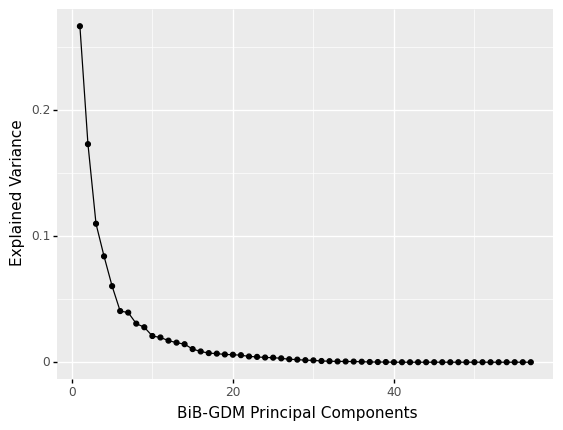

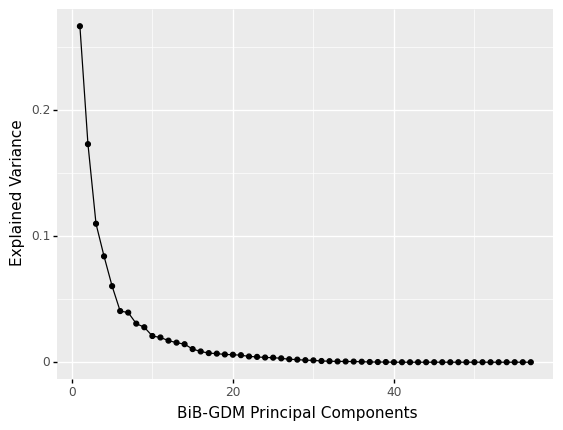

In [10]:
from plotnine import *

p = (ggplot(pcaDF, aes(x = "BiB-GDM Principal Components", y = "Explained Variance")) + geom_line() + geom_point())

p.save(filename = 'figures/pca/bib-gdm_explained_variance.png')

p.draw()

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/ssabouni/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/pca/bib-gdm_cumulative_variance.png


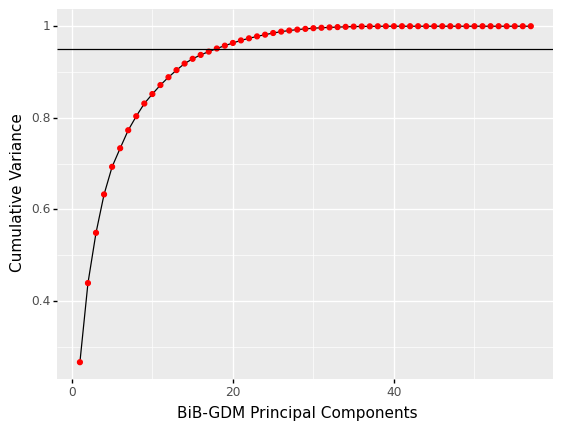

In [11]:
p = (ggplot(pcaDF, aes(x = "BiB-GDM Principal Components", y = "Cumulative Variance")) + geom_line(color = "black") +
 geom_point(color = "red") + geom_hline(yintercept = 0.95))

p.save(filename = 'figures/pca/bib-gdm_cumulative_variance.png')

p.draw()
#p.save(filename = 'figures/pca/cumulative_variance.png')

In [27]:
# choose components such that we have 95% variance
pca = PCA(.85)
pca.fit(X)

principalComponents = pca.transform(X)
principalComponents = pd.DataFrame(principalComponents)

pca.n_components_

# Therefore 18 PC components contain 95 % of variance in data

10

In [13]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1


loadings = pca_out.components_
#num_pc = pca_out.n_features_
num_pc = 18
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
#loadings_df

# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs.

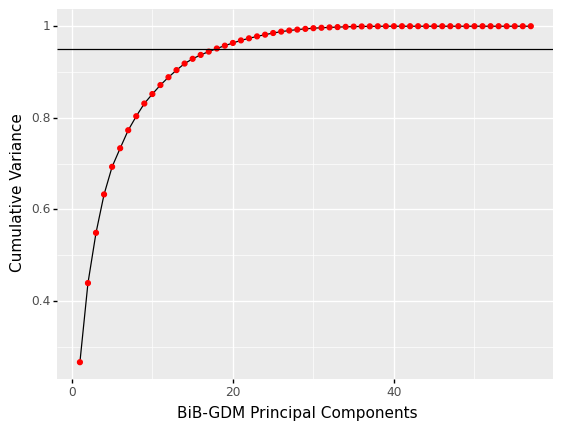

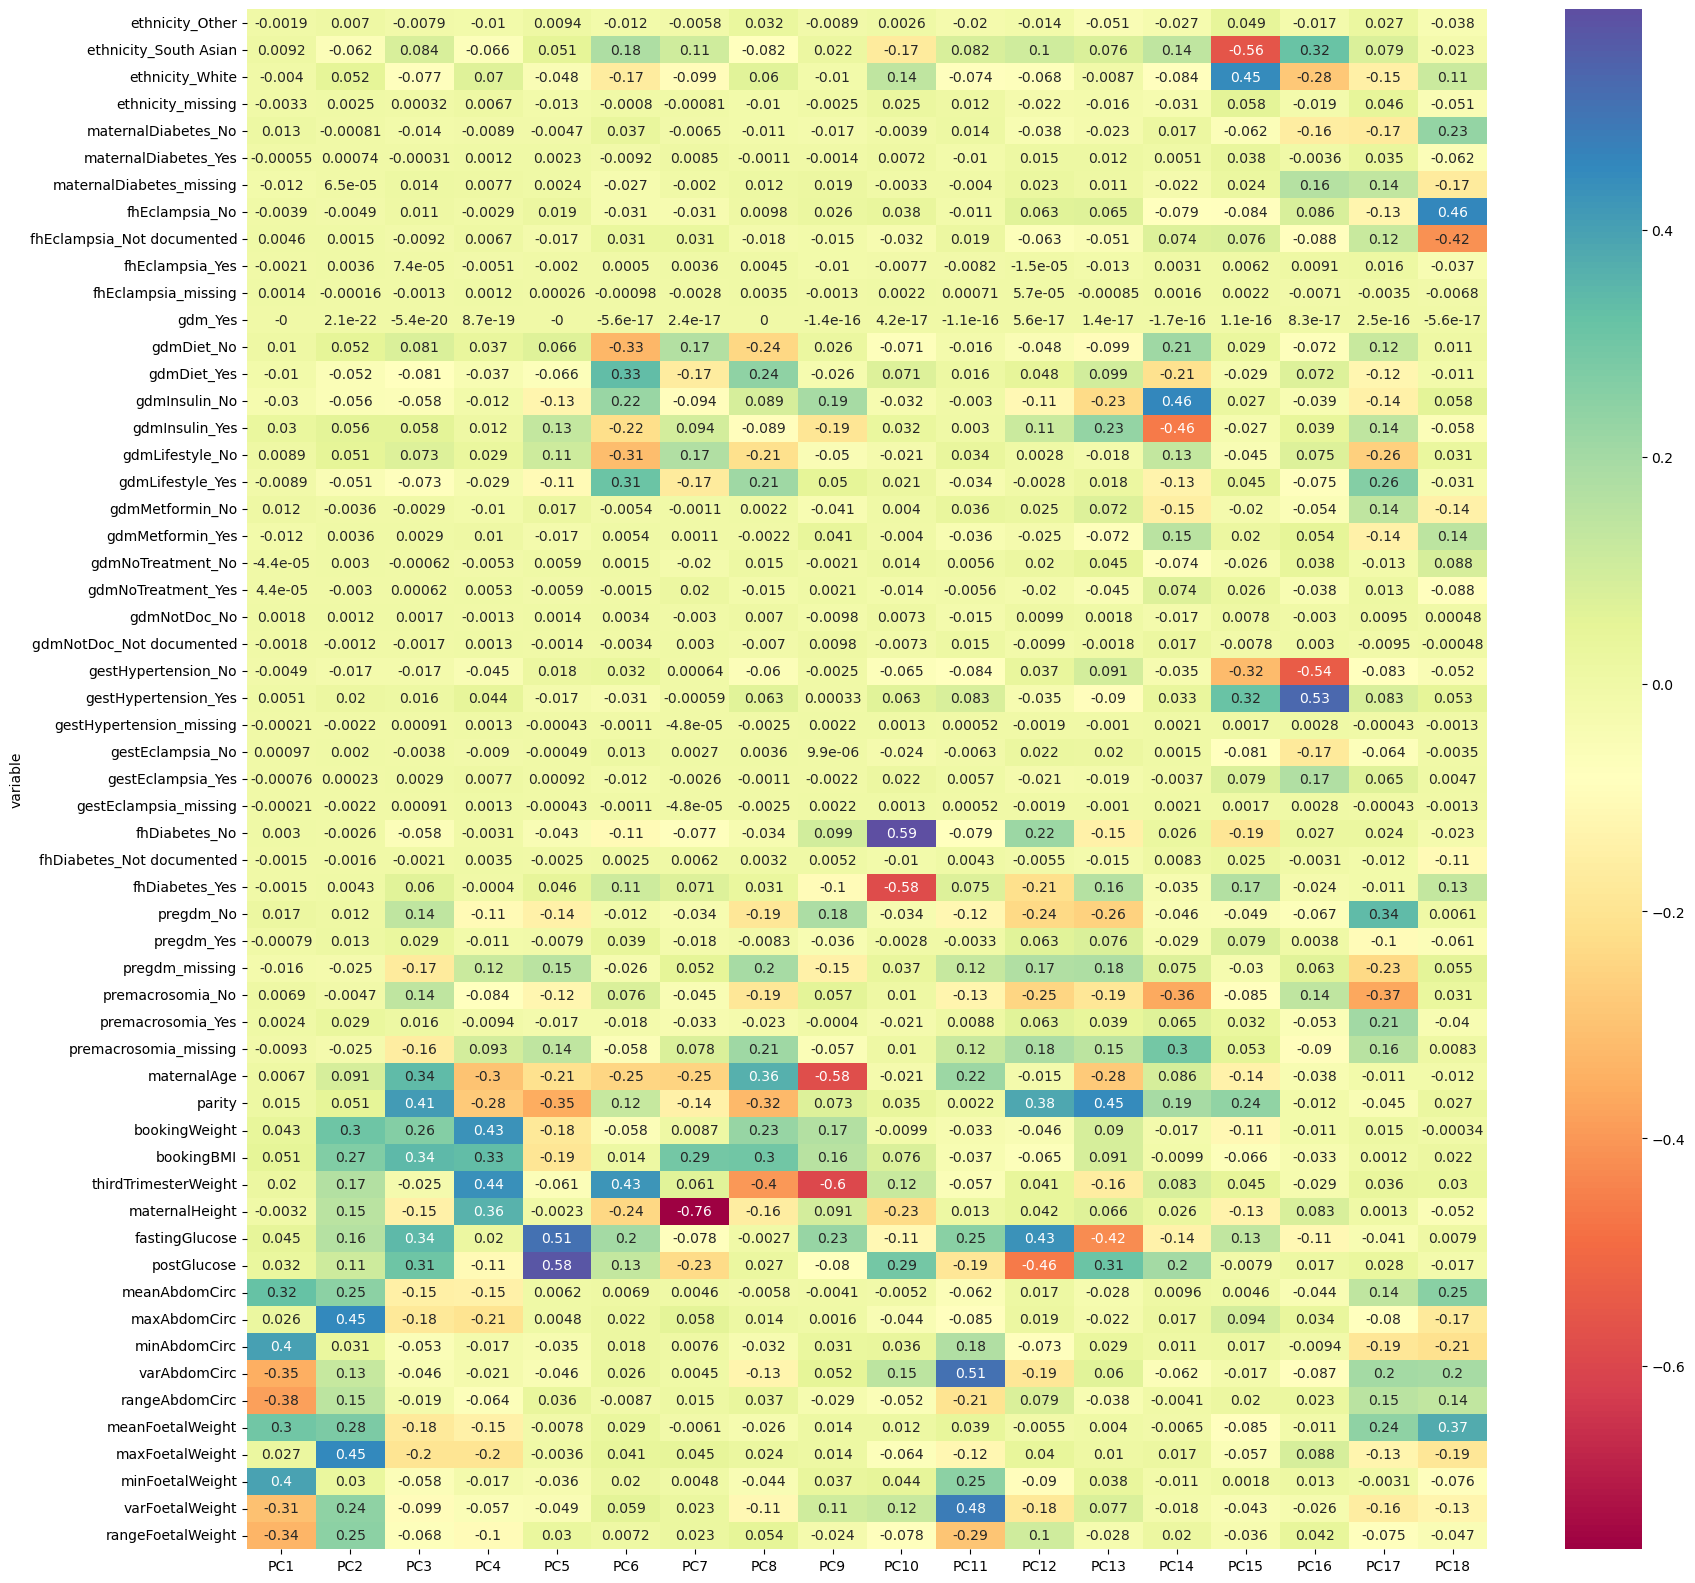

In [14]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()
fig.savefig('figures/pca/bib_GDM_pca_heatmap.svg', format='svg', dpi=1200)

In [15]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


model = PCA(n_components=18).fit(X)
X_pc = model.transform(X)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df)

       0                      1
0    PC1           minAbdomCirc
1    PC2           maxAbdomCirc
2    PC3                 parity
3    PC4   thirdTrimesterWeight
4    PC5            postGlucose
5    PC6   thirdTrimesterWeight
6    PC7         maternalHeight
7    PC8   thirdTrimesterWeight
8    PC9   thirdTrimesterWeight
9   PC10          fhDiabetes_No
10  PC11           varAbdomCirc
11  PC12            postGlucose
12  PC13                 parity
13  PC14          gdmInsulin_No
14  PC15  ethnicity_South Asian
15  PC16    gestHypertension_No
16  PC17       premacrosomia_No
17  PC18         fhEclampsia_No


In [16]:
def evaluate_model(y_test, y_pred):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0] 
    
    print('Classification Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))
    print('Classification Error: %.3f' % (1 - metrics.accuracy_score(y_test, y_pred)))
    print('Sensitivity: %.3f' % metrics.recall_score(y_test, y_pred))
    print('Specificity: %.3f' % (TN / float(TN + FP)))
    print('False Positive Rate: %.3f' % (FP / float(TN + FP)))
    print('Precision: %.3f' % (TP / float(TP + FP)))
    print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
    print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))

In [17]:
y.value_counts()

0
0    761
1     87
dtype: int64

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


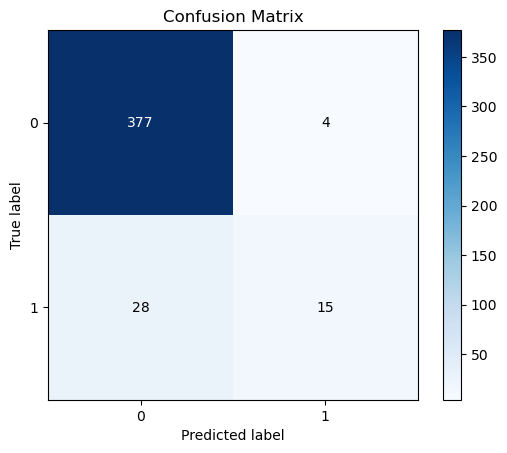

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       381
           1       0.79      0.35      0.48        43

    accuracy                           0.92       424
   macro avg       0.86      0.67      0.72       424
weighted avg       0.92      0.92      0.91       424

Classification Accuracy: 0.925
Classification Error: 0.075
Sensitivity: 0.349
Specificity: 0.990
False Positive Rate: 0.010
Precision: 0.789
F1 Score: 0.484
AUC: 0.669


In [19]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)


# baseline without PCA
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs')

# fit the model
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

# evaluate predictions
evaluate_model(y_test, y_pred)

In [20]:
y_train.value_counts()

0
0    380
1     44
dtype: int64

In [21]:
y_test.value_counts()

0
0    381
1     43
dtype: int64

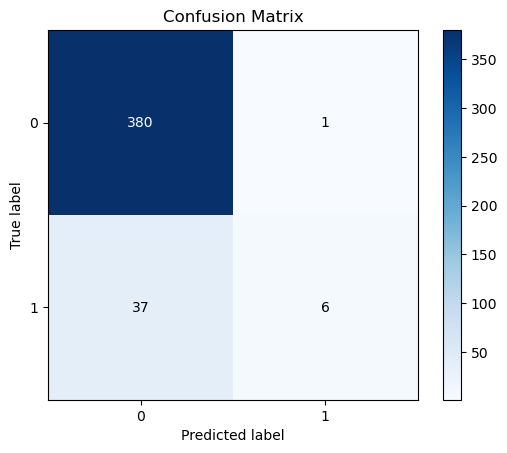

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       381
           1       0.86      0.14      0.24        43

    accuracy                           0.91       424
   macro avg       0.88      0.57      0.60       424
weighted avg       0.91      0.91      0.88       424

Classification Accuracy: 0.910
Classification Error: 0.090
Sensitivity: 0.140
Specificity: 0.997
False Positive Rate: 0.003
Precision: 0.857
F1 Score: 0.240
AUC: 0.568


In [24]:
# model with PCA

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

#pca = PCA(.95).fit(X_train)
pca = PCA(n_components=3).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca.n_components_ 

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs')

# fit the model
log = LogisticRegression(solver='lbfgs')
log.fit(X_train_pca, y_train)

y_pred = log.predict(X_test_pca)

# evaluate predictions
evaluate_model(y_test, y_pred)

In [25]:
import warnings
warnings.filterwarnings("ignore")